In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Loading data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

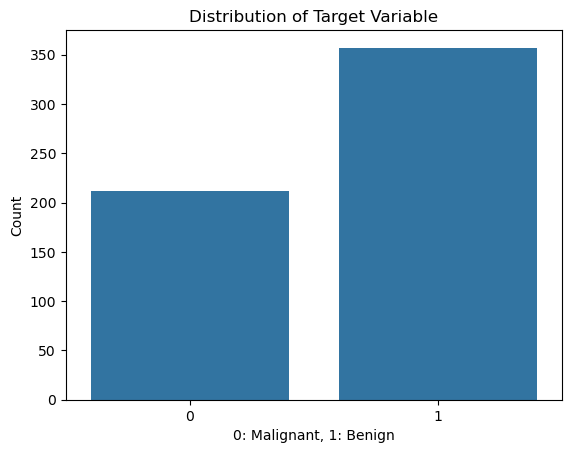

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [3]:
# Exploring the Data
print(df.head())
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('0: Malignant, 1: Benign')
plt.ylabel('Count')
plt.show()
print(df.describe())


In [4]:
 #Preprocessing the Data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Training the logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [6]:
# Evaluating Logistic Regression Model
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Confusion Matrix:
 [[41  2]
 [ 1 70]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Hyperparameter Tuning 
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)
print("Best Score for Logistic Regression:", grid.best_score_)


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.9780219780219781


In [9]:
#Final Evaluation for Logistic Regression
best_logistic_model = grid.best_estimator_
y_pred_final_logistic = best_logistic_model.predict(X_test)
print("Final Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final_logistic))
print("Final Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_final_logistic))


Final Logistic Regression Confusion Matrix:
 [[42  1]
 [ 0 71]]
Final Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



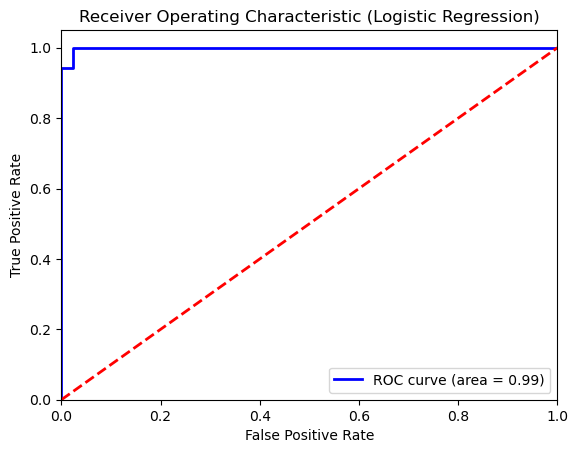

In [10]:
# Visualizations for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_final_logistic)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


In [11]:
# Train the Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)


y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest Model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy: {:.0%}".format(accuracy_rf))


Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest Model Accuracy: 96%


In [12]:
# Train the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree Model
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy: {:.0%}".format(accuracy_dt))

Decision Tree Confusion Matrix:
 [[40  3]
 [ 3 68]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree Model Accuracy: 95%


In [13]:
#SActual vs Predicted for Decision Tree
print("Predicted values: ")
print(y_pred_dt)
print()
print("Actual values: ")
print(y_test.values)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy: {:.0%}".format(accuracy_dt))

Predicted values: 
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]

Actual values: 
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Accuracy: 95%


In [14]:
# Actual vs Predicted for Logistic Regression
print("Logistic Regression Predicted values: ")
print(y_pred_final_logistic)
print()
print("Logistic Regression Actual values: ")
print(y_test.values)


accuracy_logistic = accuracy_score(y_test, y_pred_final_logistic)


print("Logistic Regression Accuracy: {:.0%}".format(accuracy_logistic))




Logistic Regression Predicted values: 
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]

Logistic Regression Actual values: 
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Logistic Regression Accuracy: 99%


In [15]:
# Actual vs Predicted for Random Forest
print("Random Forest Predicted values: ")
print(y_pred_rf)
print()
print("Random Forest Actual values: ")
print(y_test.values)

accuracy_rf = accuracy_score(y_test, y_pred_rf)


print("Random Forest Accuracy: {:.0%}".format(accuracy_rf))



Random Forest Predicted values: 
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]

Random Forest Actual values: 
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Random Forest Accuracy: 96%
